# 스타트업 성공 예측
##### 과목명 : 인공지능
##### 분반 : 02
##### 김영호(2020215729)
##### 제출일 : 2025-06-04

# 1. 요약

## 1.1 연구 배경 및 목적
스타트업은 경제 성장과 혁신을 이끄는 중요한 주체로 자리 잡고 있으며, 성공 여부에 따라 투자자와 창업자, 직원들의 미래가 크게 달라짐. <br>
따라서 스타트업의 성공 가능성을 조기에 예측하는 것은 투자 결정과 자원 배분에 있어 매우 중요한 과제임.<br> 
본 연구는 다양한 기업 데이터를 활용해 스타트업의 **성공 가능성(0.1~0.9의 확률 값)** 을 예측하는 회귀 모델을 개발함으로써투자 위험을 줄이고, 효율적인 지원 전략 수립에 기여하는 것을 목적으로 함.

## 1.2 데이터 및 연구 방법 요약
#### 데이콘에서 제공하는 스타트업 데이터 사용
1. 결측치 처리 :
    - 고객수(백만명), 기업가치(백억원)는 중앙값 대체
    - 직원 수, SNS 팔로워 수는 평균/최빈값으로 대체
    - 분야의 결측치는 'Unknown'으로 대체[1]
2. 인코딩 :
     - 국가, 분야, 인수여부, 상장여부는 원핫 인코딩
     - 투자단계는 순서형 변수로 매핑 (예: Seed → 1, Series A → 2, …)
     - 기업가치(백억원)는 구간별 중앙값으로 매핑후 결측치는 최빈값으로 대체
3. 피처 엔지니어링 :
     - 기업나이, 직원당 매출, 고객당 매출, 투자 수익비, 가치대비매출 등 파생변수 생성
4. 스케일링 :
     - 타겟 변수(성공확률) 제외한 모든 컬럼에 Min-max 스케일링 적용

## 1.3 연구 결과 요약
전처리된 데이터에서 주요 변수만 추출한후 XGBoost에 학습한결과 MAE 평가기준 **0.2068** 로 가장 좋은 성적을 보여줬다.

# 2. 서론
## 2.1 연구 목표 및 문제 정의
- 본 연구의 주요 목표는 스타트업의 성공 확률을 정확하게 예측하는 모델을 개발하는 것이다. 단순히 대회에서 좋은 성적을 얻는 것에 그치지 않고, 데이터 분석과 모델링 과정에서 논리적이고 체계적인 사고방식을 우선시하여 실질적이고 신뢰성 있는 예측 결과를 도출하는 데 중점을 둔다.
## 2.2 기존 연구 또는 유사 사례 소개
- 기존 연구들은 스타트업 성공 요인 분석, 투자 유치 가능성 예측, 기업 성장 모델링 등 다양한 방향에서 접근해왔다. 예를 들어, 기업의 재무 데이터, 시장 환경, 창업자 경력 등을 활용한 머신러닝 모델이 제안되었으며, 성공 사례 및 실패 요인 분석을 통해 예측 정확도를 높이고자 하는 시도들이 있었다.

# 3. 연구 방법
## 3.1 데이터 소개
데이콘에서 주최하는 **기업 성공 확률 예측 해커톤: 미래의 성공기업을 발굴하라!** 대회에서 제공되는 데이터를 사용<br>
train.csv, test.csv 가 주어졌으며 두 csv 파일의 컬럼은 같으며 test.csv에는 **성공확률** 컬럼이 없음

- 총 14개의 변수로 구성됨
- 총 4,736개의 데이터로 구성
- 각 행은 기업을 나타냄
- 타겟 변수는 **성공확률** 로 0.1 ~ 0.9 로 0.1 단위로 이루어짐

| 컬럼명               | 수치형 컬럼 | 범주형 컬럼 | 고유값 목록                                                                                 | 결측치 비율 |
|--------------------|-------------|-------------|---------------------------------------------------------------------------------------------|-------------|
| ID                 |             | ✅          | -                                                                                           | -           |
| 설립연도           | ✅          |             | -                                                                                           | -           |
| 국가               |             | ✅          | CT001, CT002, CT003, CT004, CT005, CT006, CT007, CT008, CT009, CT010                       | -           |
| 분야               |             | ✅          | 이커머스, 핀테크, 기술, 에듀테크, 게임, 헬스케어, 물류, 푸드테크, AI, 에너지             | 19.5%       |
| 투자단계           |             | ✅          |  Seed, Series A, Series B, Series C, IPO                                                    | -           |
| 직원 수            | ✅          |             | -                                                                                           | 3.9%        |
| 인수여부           |             | ✅          | No, Yes                                                                                     | -           |
| 상장여부           |             | ✅          | No, Yes                                                                                     | -           |
| 고객수(백만명)     | ✅          |             | -                                                                                           | 30.1%       |
| 총 투자금(억원)    | ✅          |             | -                                                                                           | -           |
| 연매출(억원)       | ✅          |             | -                                                                                           | -           |
| SNS 팔로워 수(백만명) | ✅          |             | -                                                                                           | -           |
| 기업가치(백억원)   |           |   ✅          | 1500-2500, 2500-3500, 3500-4500, 4500-6000, 6000이상                                                                                          | 27.8%       |
| 성공확률           | ✅          |             | -                                                                                           | -           |

---

## 3.2 분석 방법 및 절차

분석 목적은 스타트업의 성공확률을 예측하는 회귀 모델을 구축하는 것임.<br>  
데이터 전처리, 주요 특성 추출, 모델 학습, 성능 평가 순으로 구성됨.<br>  

### 3.2.1 데이터 전처리  
#### 정수형 및 실수형 변수 처리  
*정수형 변수의 기업가치 결측치 처리는 데이터의 분산을 토대로 결정하였음 시각화 결과는 아래에 첨부.*[4]
- 설립연도는 결측치가 없어 원본 그대로 사용했음.<br>  
- 직원 수는 3.9%의 결측치를 평균으로 대체했고, 정수형으로 변환했음.<br>   
- 고객수는 30.1%의 결측치를 중앙값으로 대체함.
- 총 투자금과 연매출은 결측치가 없어 원본 데이터를 그대로 사용했으며, 메모리 최적화를 위해 정수형으로 변환함.<br>
- SNS 팔로워 수는 결측치를 최빈값으로 대체함.

#### 범주형 변수 처리  
- 국가, 인수여부, 상장여부는 결측치가 없어 원-핫 인코딩을 적용했음.<br>  
- 분야는 19.5%의 결측치를 'Unknown'으로 대체한 뒤 원-핫 인코딩을 수행했음.<br>  
- 투자단계는 순서형 특성이 있어 숫자로 매핑 처리했음.<br>  
- 기업가치는 27.8%의 결측치를 중앙값으로 대체함.


전처리 전략과 코드는 아래 부록에.<br>  

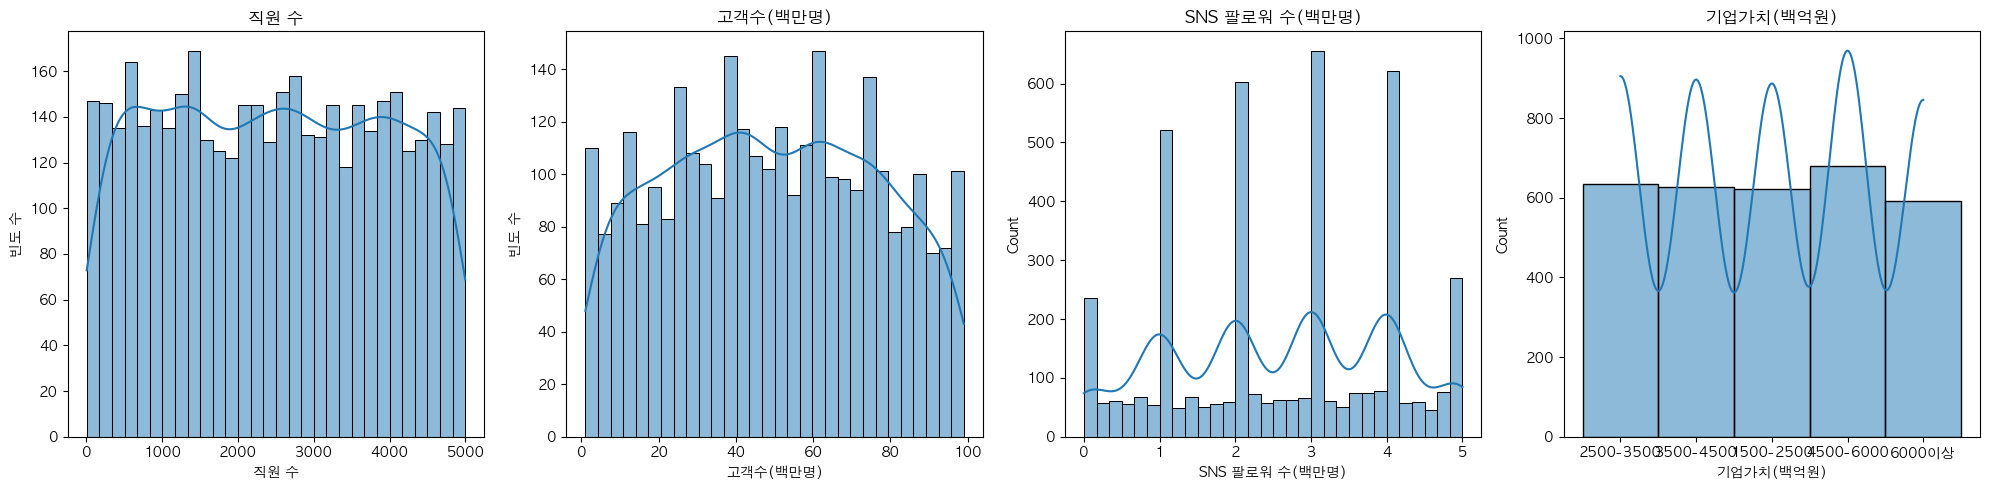

### 3.2.2 파생변수 생성[5]

- 기업나이는 2025년에서 설립연도를 뺀 값으로 계산했음<br>  
- 직원당 매출은 연매출을 직원 수로 나눈 값으로 산출했음<br>  
- 고객당 매출은 연매출을 고객 수로 나눈 값으로 계산했음<br>  
- 투자수익비는 연매출을 총 투자금으로 나눈 값으로 구함<br>  
- SNS 팔로워 등급은 팔로워 수를 기준으로 3단계 구간(낮음/중간/높음)으로 분류했음<br>  
- 가치대비 매출은 기업가치를 연매출로 나눈 값으로 산출했음<br>  
- 총 투자금당 직원 수는 직원 수를 총 투자금으로 나눈 값으로 계산했음<br>  

이 중 기업 나이와 SNS 팔로워 등급을 제외한 대부분의 파생변수는 0에 편향된 분포를 보여주었음.<br>
이러한 변수들은 그대로 모델에 입력할 경우 예측 성능을 저하시키므로 로그(Log)변환을 적용하여 보다 정규분포에 가까운 형태로 변환하였음.<br>

파생변수 생성 결과는 부록에 요약했음<br>  

### 3.2.3 스케일링  
스케일링은 Min-Max 스케일링을 적용함<br>  

### 3.2.4 주요 변수 추출
전처리된 데이터를 이용해 MLP, Random Forest, LightGBM, XGBoost 모델을 학습했으나 기대만큼의 성과를 얻지 못하였음.<br>
이에 주요 변수를 추출하기 위해 Random Forest를 활용하였으며, 그 결과는 다음과 같음.<br>

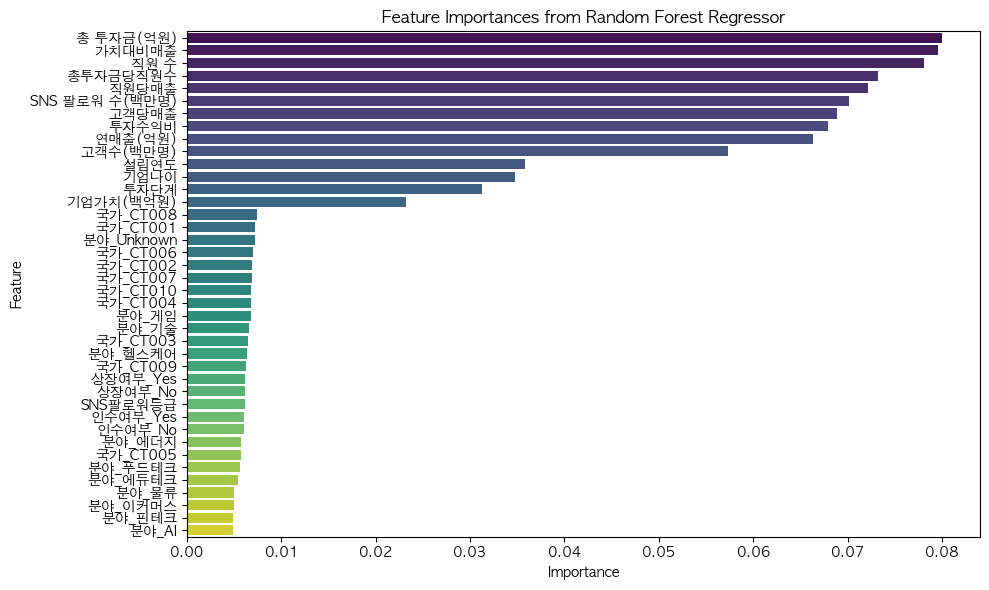

변수 중요도 분석 결과, Random Forest Regressor는 계량적(수치형) 변수에 높은 중요도를 부여하는 경향을 보였으며,<br>
특히 직원 수, 연매출, 총 투자금 등 정량적 특성 변수들이 중요도 상위에 위치한 반면, 범주형 변수들은 상대적으로 낮은 중요도를 보였음.<br>

이에 따라 주요 수치형 변수 및 파생 변수를 중심으로 학습 및 테스트 데이터셋을 재구성하였고,<br>
선정된 변수는 총 투자금(억원), 가치대비매출, 직원 수, 총투자금당직원수, 직원당매출, SNS 팔로워 수(백만명), 고객당매출, 투자수익비, 연매출(억원), 고객수(백만명), 설립연도, 기업나이, 투자단계, 기업가치(백억원)이다.<br>

이러한 변수 선택을 통해 모델 성능이 향상되었으며,<br>
가장 성능이 좋았던 XGBoost의 MAE는 0.2693에서 0.2068로 성능이 향상됨을 확인할 수 있었음으로 주요변수 추출이 의미있음을 확인함.<br>

최종 전처리된 데이터셋은 아래와 같음

### 학습 데이터

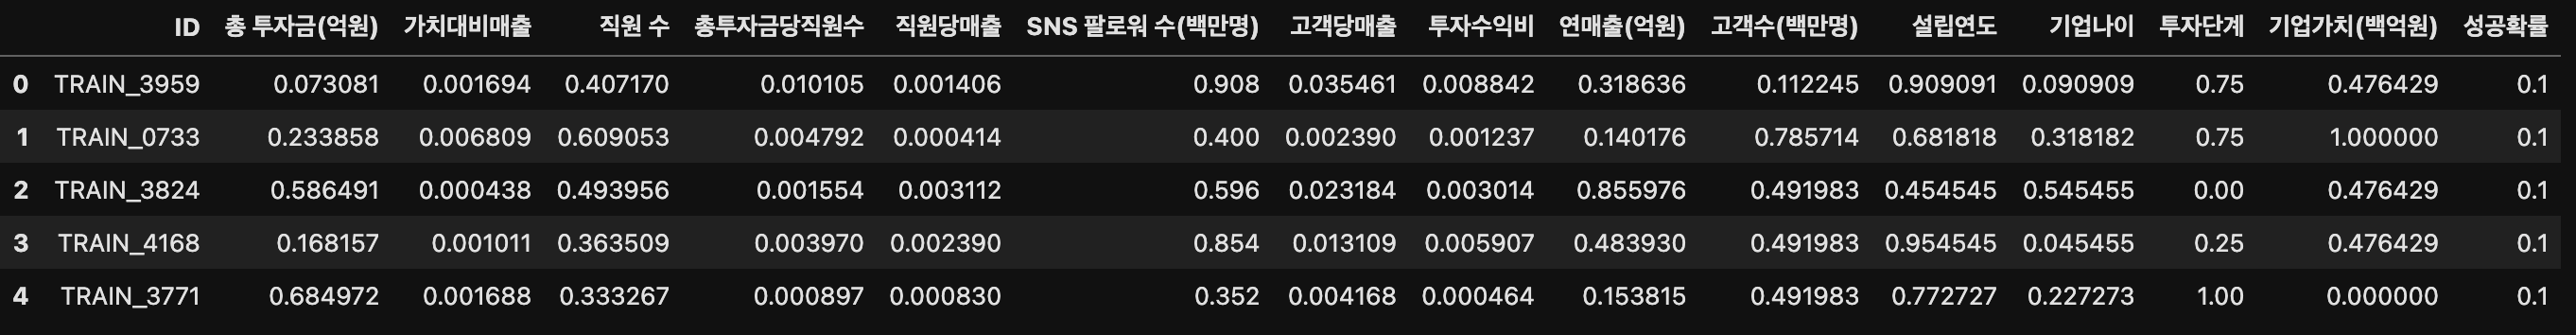

### 검증 데이터

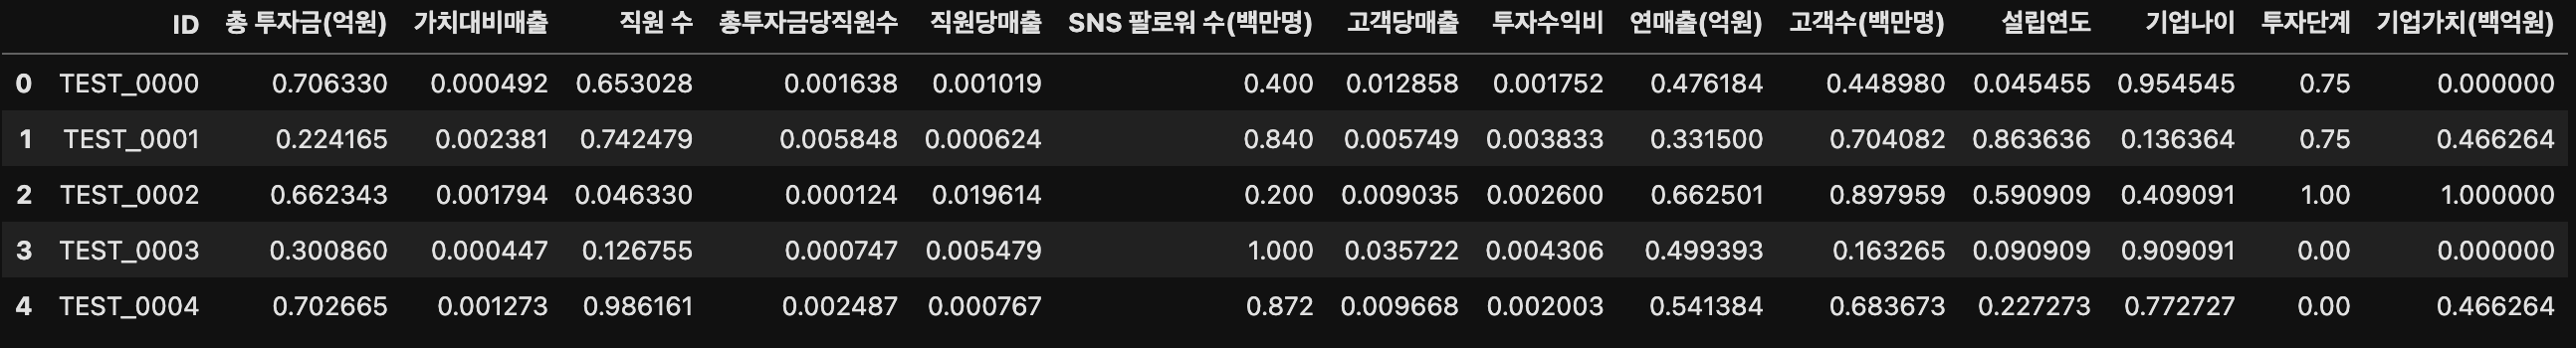

## 3.3 사용한 AI 모델 및 훈련 과정  
전처리된 데이터를 Random Forest의 변수 중요도를 바탕으로 주요 변수를 선별한 후, 이를 기반으로 다른 모델(LGBM, MLP, Random Forest, XGBoost)을 학습시키는 방식으로 실험을 설계하였음.[2][3]<br>
10-Fold 교차 검증을 통해 MAE 기준으로 성능을 평가하였음 (하이퍼파라미터 세부 정보는 부록 참조)<br>  

# 4. 실험 및 결과  

## 4.1 실험 과정 소개  
실험 과정에서는 LGBM, MLP, Random Forest, XGBoost모델을 각각 학습시켜 성능을 비교하였음.<br>
그러나 만족할만한 성능이 나오지 못해 렌덤포레스트로 변수 중요도를 확인후 주요 변수만 사용 변수 중요도 판별.<br>
10-Fold 교차 검증을 통해 MAE(Mean Absolute Error)를 평가 지표로 사용함.<br>  
그 결과, XGBoost가 평균 MAE 0.2068로 가장 우수한 성능을 보였고, 그 뒤를 LGBM(0.2113), Random Forest(0.2305), MLP(0.2830)가 따름.<br>  

## 4.2 성능 비교  
모델별 예측 성능을 비교한 결과, XGBoost가 평균 MAE 0.2068로 가장 우수한 성능을 나타냈다.<br>
XGBoost는 복잡한 비선형 관계를 효과적으로 학습하고, 결측치 처리 및 변수 간 상호작용을 잘 반영할 수 있는 구조를 갖추고 있어 높은 예측 정확도를 달성한 것으로 판단된다.<br>

그 뒤를 이어 LGBM(0.2113), Random Forest(0.2305), MLP(0.2830) 순으로 성능을 보였다.<br>
전반적으로 앙상블 기반 모델들이 MLP보다 더 낮은 예측 오차를 기록하였으며, 특히 Gradient Boosting 계열의 XGBoost와 LightGBM이 가장 안정적이고 정확한 예측력을 보여주었다.<br>

# 5. 결론

## 5.1 실험 결과 분석 및 평가
실험 결과, XGBoost와 LightGBM 등 Gradient Boosting 계열 모델이 가장 낮은 MAE를 기록하며 높은 예측 성능을 보였음.<br>
이는 해당 모델들이 변수 간 복잡한 비선형 관계를 효과적으로 학습했기 때문으로 해석됨. 반면, MLP는 비교적 높은 MAE를 보여 비정형 변수나 표본 수에 민감한 특성을 드러냈음.<br> 
전처리 과정에서 변수 선택을 통해 모델 성능이 전반적으로 향상되었으며, 특히 불필요한 변수 제거가 성능 개선에 긍정적인 영향을 준 것으로 판단됨.

## 5.2 주요 연구 결과 요약
본 연구에서는 스타트업 데이터를 활용해 기업의 성공 가능성을 예측하고자 다양한 머신러닝 모델을 실험함.<br>
변수 중요도를 기반으로 주요 변수를 선별한 뒤 모델을 학습한 결과, XGBoost가 가장 우수한 성능(MAE 0.2068)을 기록함.<br>
전반적으로 Gradient Boosting 계열 모델이 높은 예측력을 보였으며, 변수 선택이 성능 향상에 효과적임을 확인할 수 있었음.

## 5.3 연구의 강점과 한계점
본 연구의 강점은 실제 스타트업 데이터를 기반으로 다양한 머신러닝 모델을 비교하고, 변수 선택과 파생 변수 생성을 통해 예측 성능을 효과적으로 향상시켰다는 점임.
또한 MAE와 같은 직관적인 평가지표를 사용하여 모델 성능을 객관적으로 평가했음.<br>

반면, 한계점도 존재했음.
일부 변수의 결측치가 많아 단순 대체 방식에 의존했으며, 파생 변수 정의 역시 도메인 지식보다는 수치적 조작에 가까웠음.
특히, 결측치 비율이 30%를 초과하는 컬럼에 대해 단일값으로 일괄 대체하는 방식으로 전처리를 진행한 점은 아쉬운 부분임.
KNN 등 다른 결측치 대체 방법도 시도했으나, 만족할 만한 성능 향상을 얻지 못했음.

## 5.4 향후 연구 방향 및 기대 효과
향후 연구에서는 외부 데이터(예: 산업 동향, 거시경제 지표, SNS 감성 분석 등)를 추가로 결합하여 예측 정확도를 더욱 높일 수 있을 것으로 기대됨.<br>
또한 변수 선택 과정에 전문가 도메인 지식을 접목하거나, AutoML 기반의 최적 모델 탐색 기법을 활용하는 방안도 고려할 수 있음.  <br>
예측 모델이 충분히 정교해질 경우, 벤처 투자자나 창업 지원 기관 등이 유망 스타트업을 사전에 판별하는 데 실질적인 도움을 줄 수 있으며, 궁극적으로 스타트업 생태계의 효율성과 투자 성공률 제고에 기여할 수 있을 것으로 기대됨.

# 참고문헌

[1] Kumar, P., Snizhko, K., “Comment on ‘How to observe and quantify quantum-discord states via correlations’,” Phys. Rev. A, 102(1), 016401, 2020.

[2] Kim, J., Choi, S., Song, C., “A Study on Understanding the Determinants of Scale-up Success for Start-ups,” Journal of the Korean Entrepreneurship Society (JKES), 19(2), 203-235, 2024

[3] Kim, Y., Cho, H., Lee, C., Cho, J., “A Study on the Machine Learning Model for the Financial Performance Prediction of Startups,” Asia-Pacific Journal of Convergence Research Interchange (APJCRI), 9(7), 67-77, 2023

[4] 분산, https://letsdatascience.com/handling-missing-values/, 2025.05

[5] 파생변수, https://eda-ai-lab.tistory.com/642. 2025.05

# 부록

## 표

### 전처리 전략 요약 표


| 변수명                 | 데이터 유형             | 결측치 비율 | 처리 방법                            | 추가 가능 처리                   |
|------------------------|--------------------------|--------------|----------------------------------------|----------------------------------|
| 설립연도               | 정수형                   | 없음         | 원본 그대로 사용                       | 기업 나이 파생 가능              |
| 국가                   | 범주형 (문자열)         | 없음         | 원-핫 인코딩                           | -                                |
| 분야                   | 범주형                   | 19.5%        | 'Unknown' 대체 후 원-핫 인코딩        | -                                |
| 투자단계               | 순서형 범주              | 없음         | 숫자 매핑                              |-|
| 직원 수                | 실수형                   | 3.9%         | 평균 대체                              | 정수 변환 가능                   |
| 인수여부               | 범주형 (예/아니오)       | 없음         | 원-핫 인코딩                           | -                                |
| 상장여부               | 범주형 (상장/비상장)     | 없음         | 원-핫 인코딩                           | -                                |
| 고객수 (백만명)        | 실수형                   | 30.1%        | 중앙값 대체                            |  구간화 가능          |
| 총 투자금 (억원)       | 실수형                   | 없음         | 원본 사용                              | 정수 변환 시 메모리 최적화 가능 |
| 연매출 (억원)          | 실수형                   | 없음         | 원본 사용                              | 정수 변환 시 메모리 최적화 가능 |
| SNS 팔로워 수 (백만명) | 수치형                   | 있음         | 최빈값 대체                            | 구간화 분포 특성 활용 가능      |
| 기업가치 (백억원)      | 범주형 (구간형)          | 27.8%        | 최빈값 대체         | 수치화 및 순서형 처리 가능      |

### 파생 변수 요약 표

| 파생 변수명           | 계산 방식                                             | 의미 설명                                |
|----------------------|------------------------------------------------------|-------------------------------------------|
| 기업나이             | 2025 - 설립연도                                      | 기업의 운영 기간                          |
| 직원당 매출          | 연매출 / 직원 수                                     | 직원 1인당 평균 매출 규모                 |
| 고객당 매출          | 연매출 / 고객수                                      | 고객 1명당 평균 매출 규모                 |
| 투자수익비           | 연매출 / 총 투자금                                   | 투자 대비 매출 수익성                     |
| SNS 팔로워 등급      | 팔로워 수 기준 구간화 (낮음: 0-1, 중간:1-3, 높음: 3-10) | SNS 영향력 크기 구간화                    |
| 가치대비 매출        | 기업가치 / 연매출                                    | 기업가치 대비 매출 규모 평가              |
| 총 투자금당 직원 수  | 직원 수 / 총 투자금                                  | 투자금 대비 직원 규모                     |

## 코드

### 전처리 코드

In [6]:
def preprocess(df):
    # 1. 설립연도: 결측치 없음, 그대로 사용 (패스)
    
    # 2. 국가: 원핫 인코딩 수행 (범주형 → 더미 변수)
    df = pd.get_dummies(df, columns=['국가'])

    # 3. 분야: 결측치는 'Unknown'으로 채우고 원핫 인코딩 수행
    df['분야'].fillna('Unknown', inplace=True)
    df = pd.get_dummies(df, columns=['분야'])

    # 4. 투자단계: 범주형 단계를 순서가 있는 숫자값으로 매핑
    investment_stage_order = {
        'Seed': 0,
        'Series A': 1,
        'Series B': 2,
        'Series C': 3,
        'IPO': 4
    }
    df['투자단계'] = df['투자단계'].map(investment_stage_order)

    # 5. 직원 수: 결측치는 평균값으로 대체
    mean_emp = df['직원 수'].mean()
    df['직원 수'].fillna(mean_emp, inplace=True)

    # 6. 인수여부, 상장여부: 원핫 인코딩 (Yes/No → 0/1 컬럼 분리)
    df = pd.get_dummies(df, columns=['인수여부', '상장여부'])

    # 7. 고객수(백만명): 결측치는 중앙값으로 대체
    median_cust = df['고객수(백만명)'].median()
    df['고객수(백만명)'].fillna(median_cust, inplace=True)

    # 8. 총 투자금, 연매출: 실수형이 아닌 정수형으로 변환하여 메모리 절약 및 일관성 유지
    df['총 투자금(억원)'] = df['총 투자금(억원)'].astype(int)
    df['연매출(억원)'] = df['연매출(억원)'].astype(int)

    # 9. SNS 팔로워 수: 결측치는 최빈값으로 대체
    mode_sns = df['SNS 팔로워 수(백만명)'].mode()[0]
    df['SNS 팔로워 수(백만명)'].fillna(mode_sns, inplace=True)

    # 10. 기업가치(백억원): 범위 문자열 → 대표값으로 매핑 후, 결측치는 5250으로 대체
    value_map = {
        '1500-2500': 2000,
        '2500-3500': 3000,
        '3500-4500': 4000,
        '4500-6000': 5250,
        '6000이상': 6500
    }
    # 범위 문자열을 숫자 대표값으로 매핑
    df['기업가치(백억원)'] = df['기업가치(백억원)'].map(value_map)

    # 매핑 후 생긴 결측치에 대해 5250(중간값)으로 대체
    df['기업가치(백억원)'].fillna(5250, inplace=True)

    return df

### 파생변수 생성 코드

In [7]:
def add_features(df):
    # 1. 기업나이
    df['기업나이'] = 2025 - df['설립연도']

    # 2. 직원당 매출
    df['직원당매출'] = df['연매출(억원)'] / df['직원 수'].replace(0, np.nan)

    # 3. 고객당 매출
    df['고객당매출'] = df['연매출(억원)'] / df['고객수(백만명)'].replace(0, np.nan)

    # 4. 투자수익비
    df['투자수익비'] = df['연매출(억원)'] / df['총 투자금(억원)'].replace(0, np.nan)

    # 5. SNS 팔로워 등급
    df['SNS팔로워등급'] = pd.cut(df['SNS 팔로워 수(백만명)'],
                                 bins=[-1, 1, 3, 10],
                                 labels=[0, 1, 2])  # 낮음=0, 중간=1, 높음=2
    df['SNS팔로워등급'] = df['SNS팔로워등급'].astype(int)

    # 6. 가치대비매출 (기업가치 결측치 처리 포함)
    df['가치대비매출'] = df['기업가치(백억원)'] / df['연매출(억원)'].replace(0, np.nan)

    # 7. 총투자금당직원수
    df['총투자금당직원수'] = df['직원 수'] / df['총 투자금(억원)'].replace(0, np.nan)

    return df

## 시각화 자료

### 파생변수 분산 시각화 결과

#### 로그 변환 전

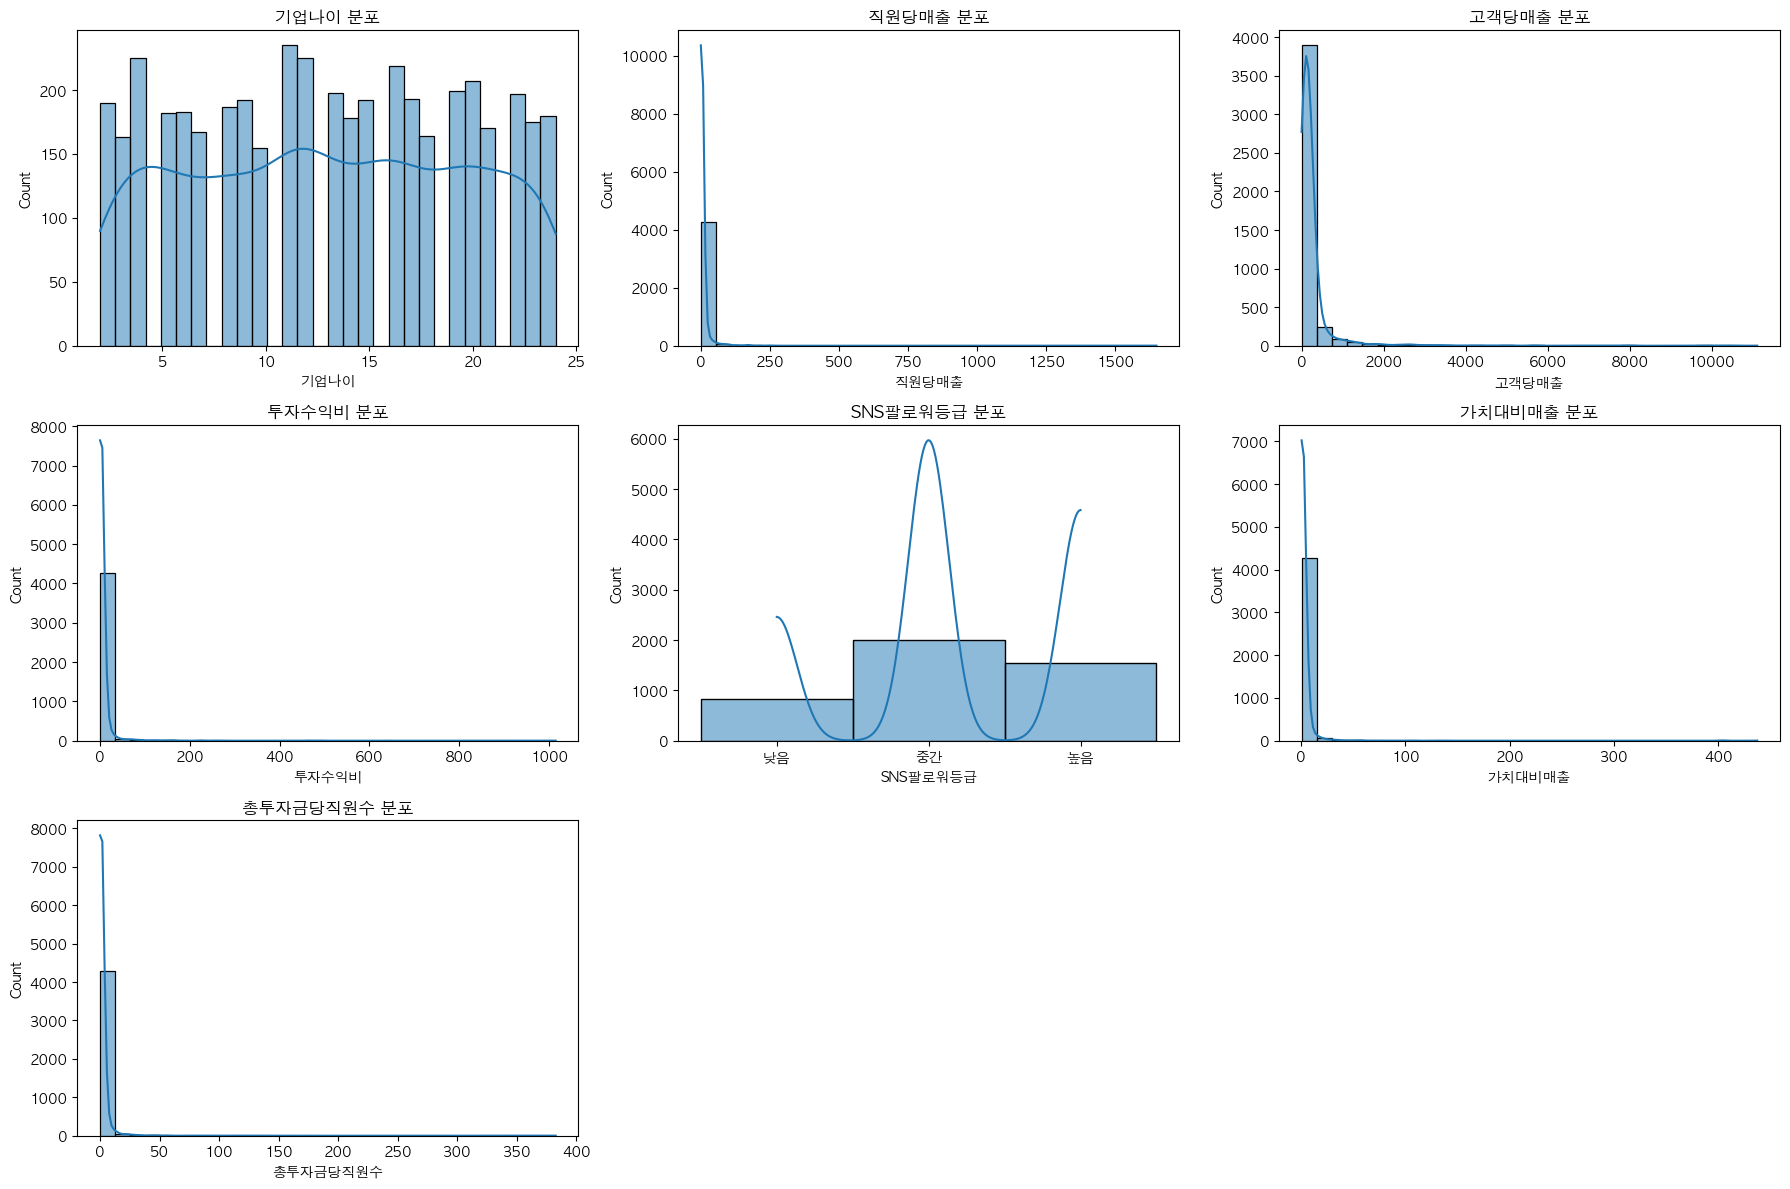

#### 로그 변환 후

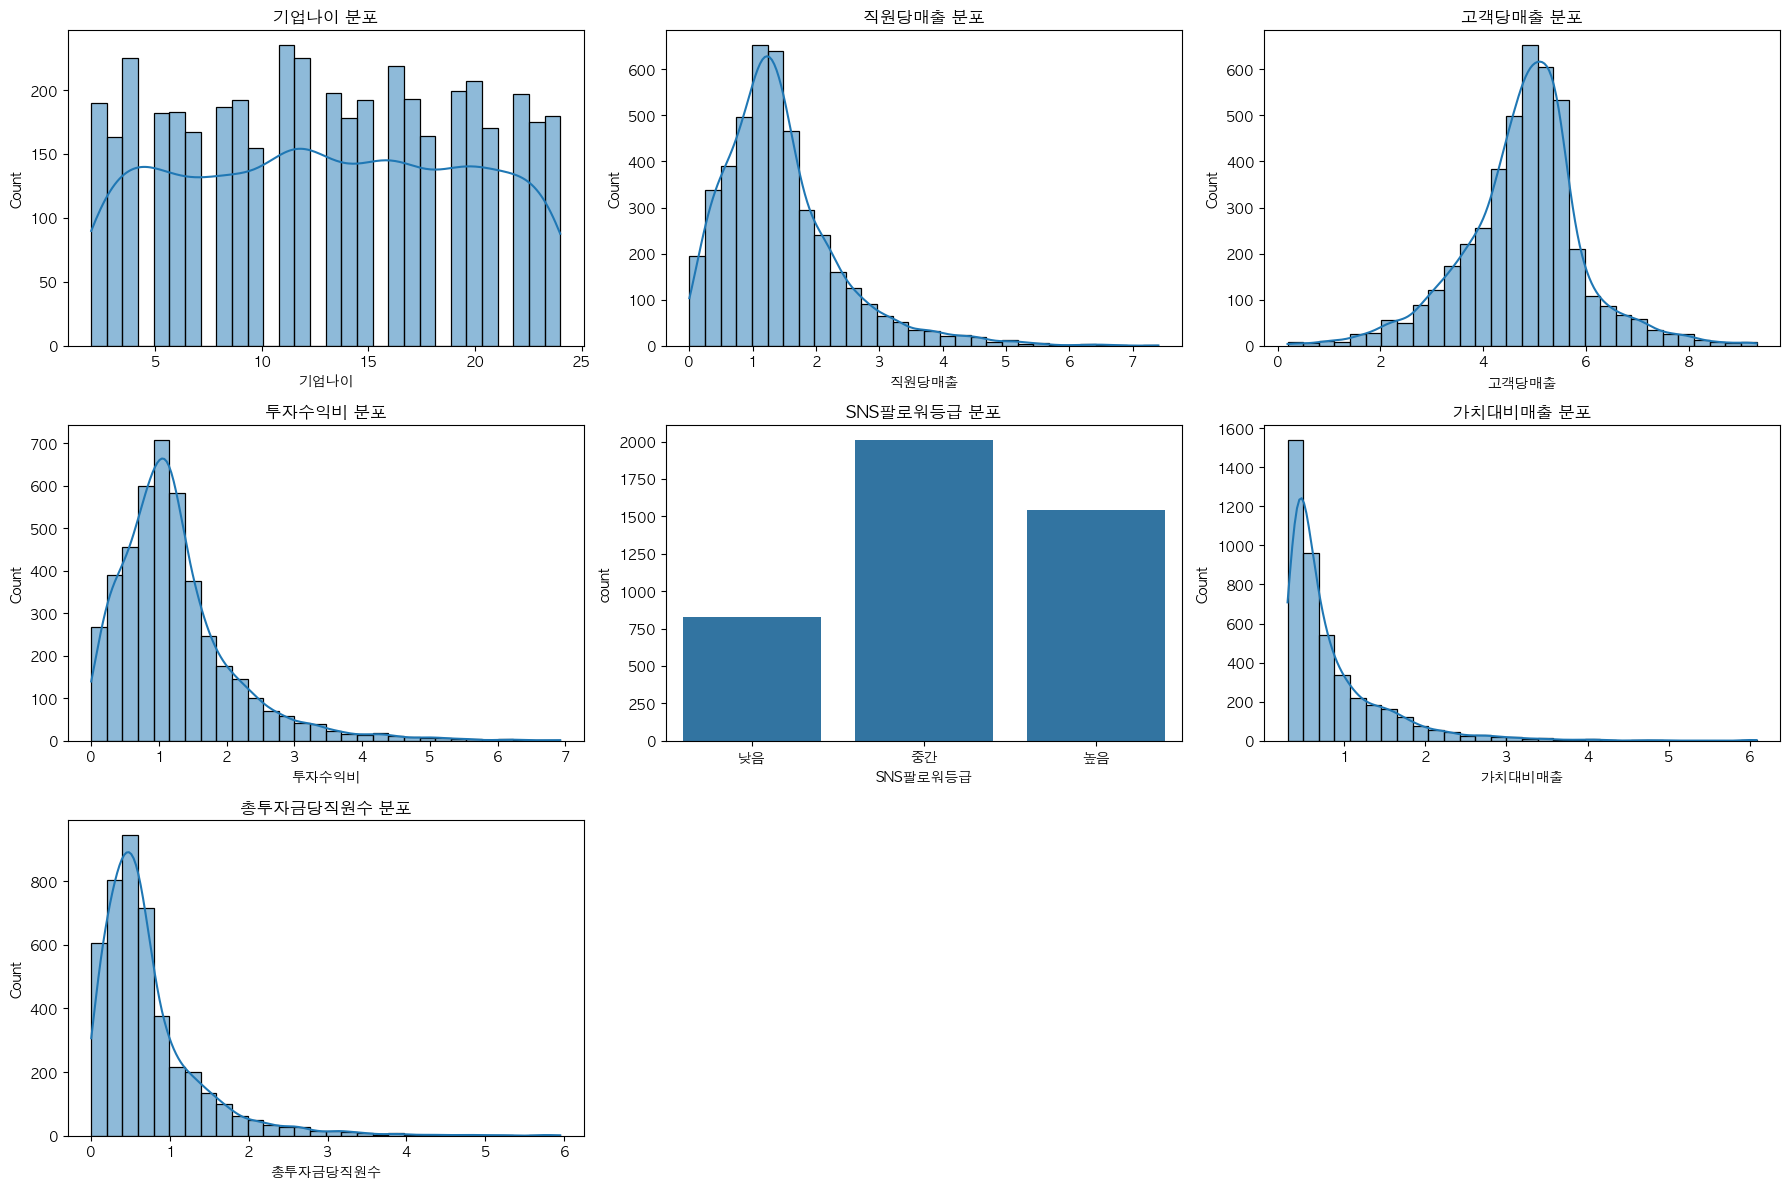

## 파라미터

### 📌 주요 모델별 하이퍼파라미터 요약

| 모델        | 하이퍼파라미터           | 기본값         |
|-------------|---------------------------|----------------|
| **LGBM**    | `boosting_type`           | `'gbdt'`       |
|             | `num_leaves`              | `31`           |
|             | `max_depth`               | `-1`           |
|             | `learning_rate`           | `0.1`          |
|             | `n_estimators`            | `100`          |
|             | `subsample_for_bin`       | `200000`       |
|             | `min_split_gain`          | `0.0`          |
|             | `min_child_weight`        | `1e-3`         |
|             | `min_child_samples`       | `20`           |
|             | `subsample`               | `1.0`          |
|             | `subsample_freq`          | `0`            |
|             | `colsample_bytree`        | `1.0`          |
|             | `reg_alpha`               | `0.0`          |
|             | `reg_lambda`              | `0.0`          |
|             | `random_state`            | `None`         |
|             | `n_jobs`                  | `-1`           |
| **RandomForest** | `n_estimators`       | `100`          |
|             | `criterion`               | `'gini'`       |
|             | `max_depth`               | `None`         |
|             | `min_samples_split`       | `2`            |
|             | `min_samples_leaf`        | `1`            |
|             | `max_features`            | `'sqrt'`       |
|             | `bootstrap`               | `True`         |
|             | `oob_score`               | `False`        |
|             | `n_jobs`                  | `None`         |
|             | `random_state`            | `None`         |
| **XGBoost** | `booster`                 | `'gbtree'`     |
|             | `n_estimators`            | `100`          |
|             | `learning_rate`           | `0.3`          |
|             | `max_depth`               | `6`            |
|             | `min_child_weight`        | `1`            |
|             | `subsample`               | `1.0`          |
|             | `colsample_bytree`        | `1.0`          |
|             | `gamma`                   | `0`            |
|             | `reg_alpha`               | `0`            |
|             | `reg_lambda`              | `1`            |
|             | `n_jobs`                  | `None`         |
|             | `random_state`            | `None`         |
| **MLP (Keras)** | `hidden_layer_sizes` | `(100,)`       |
|             | `activation`              | `'relu'`       |
|             | `optimizer`               | `'adam'`       |
|             | `loss`                    | `'categorical_crossentropy'` |
|             | `metrics`                 | `['accuracy']` |
|             | `batch_size`              | `32`           |
|             | `epochs`                  | `100`          |
|             | `learning_rate`           | `0.001`        |
|             | `early_stopping`          | `False`        |
|             | `validation_split`        | `0.1`          |